# Chapter 6. 妙妙工具
本章会记录一些看起来还蛮有用的工具，包括
- 微分方程数值解

还有些看起来不错但是没试过的
- [PyGAD](https://pygad.readthedocs.io/): 基于 Keras 和 PyTorch 的遗传算法实现

更多好用的工具，等你挖掘🫵

## 微分方程数值解
在数值计算领域内，高精度的算法通常仅针对常微分方程的边值问题。对于一阶初值问题
$$
\left\{
    \begin{array}{l}
    y'=f(y, t)\\
    y(t_0)=y_0
    \end{array}
\right.\\
$$

`scipy.integrate.solve_ivp` 与 `scipy.integrate.solve_bvp` 可以用来计算常微分方程的初值和边值问题。

如果速度太慢，可以尝试把 `method` 改成 'Radau' 或 'BDF'

下面是代码

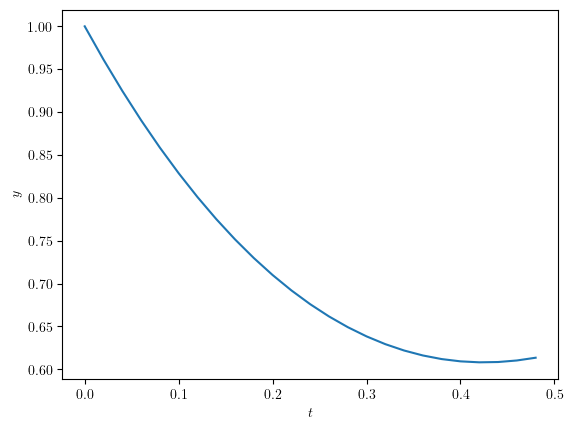

In [12]:
import numpy
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
solution=solve_ivp(
    lambda x,y: -2*y+2*x*x+2*x, 
    [0, 0.5], [1],
    t_eval=numpy.arange(0,0.5,0.02))

plt.rcParams.update({"text.usetex": True,}) # latex 万岁
plt.plot(solution.t, solution.y[0])
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.show()

对于高阶常微分方程，需要化为
$$
\left\{
    \begin{array}{l}
    (y_1',y_2'...y_n')=(f_1, f_2...f_n)\\
    (y_{10},y_{20}...y_{n0})
    \end{array}
\right.\\
$$

的形式。例如 van der Pol 方程
$$
\left\{
    \begin{array}{l}
    \ddot y-10(1-y^2)\dot y+y=0\\
    y(0)=2\\
    \dot y(0)=0
    \end{array}
\right.\\
$$

方程需要化为
$$
\left\{
    \begin{array}{l}
    \dot y_1=y_2, & y_1(0)=2 \\
    \dot y_2=10(1-y_1^2)y_2-y_1, & y_2(0)=0
    \end{array}
\right.\\
$$

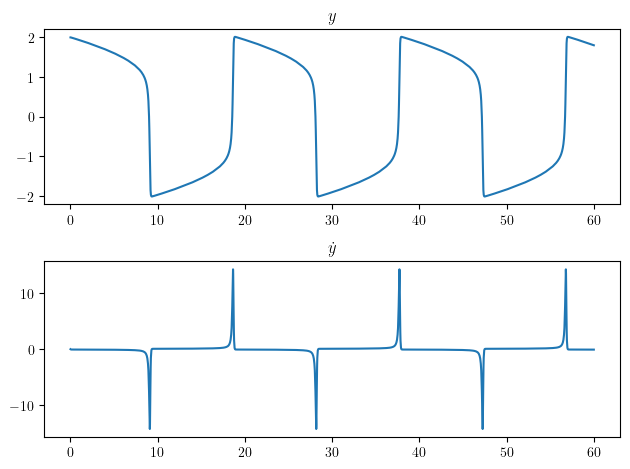

In [11]:
import numpy
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
solution=solve_ivp(
    lambda x,y: [y[1], 10*(1-y[0]**2)*y[1]-y[0]], 
    [0, 60], [2,0],
    method='Radau'
    )

plt.rcParams.update({"text.usetex": True,}) # latex 万岁
fig, (ax1, ax2)=plt.subplots(2)
ax1.set_title('$y$')
ax1.plot(solution.t, solution.y[0])
ax2.set_title('$\\dot y$')
ax2.plot(solution.t, solution.y[1])
plt.tight_layout()
plt.show()